**Gathering Data**

In [503]:
#importing the needed libraries
import tweepy
import requests
import pandas as pd
import json
import time
from functools import reduce
import matplotlib.pyplot as pl
import seaborn as sns
import math
import re

In [504]:
#reading the twitter-archive-enhanced.csv file using pandas library
data_csv = pd.read_csv('twitter-archive-enhanced.csv')
data_csv.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [505]:
#download image-predictions.tsv using the Requests library
Data_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
rs = requests.get(Data_url)

with open(Data_url.split('/')[-1], mode = 'wb') as file:
    file.write(rs.content)
    
#Reading tweet image predictions TSV file
data_img = pd.read_csv('image-predictions.tsv', sep='\t')
data_img.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


 I will not use twitter API but this is the needed steps.

In [506]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True)

since i am not going to use twitter API i have to read the JSON file.

In [507]:
data_list = []
with open('tweet-json.txt', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        Json_Record = json.loads(line)
        
        #dictionaries
        data_list.append({'tweet_id': Json_Record['id'],'retweet_count': Json_Record['retweet_count'],
                        'favorite_count': Json_Record['favorite_count'],' ':Json_Record['created_at'],
                        'language':Json_Record['lang'],'display_text_range': Json_Record['display_text_range'],
                        'source':Json_Record['source']})
#align rows and column labels using pandas DataFrame
tweets_data = pd.DataFrame(data_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','creat_date','language','display_text_range','source'])

#to check the result
tweets_data.info()
tweets_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
creat_date            0 non-null float64
language              2354 non-null object
display_text_range    2354 non-null object
source                2354 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 128.8+ KB


,tweet_id,retweet_count,favorite_count,creat_date,language,display_text_range,source
0,892420643555336193,8853,39467,NaN,en,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,NaN,en,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,NaN,en,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,3261,20562,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,2158,12041,NaN,en,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,16716,56848,NaN,en,"[0, 118]","<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,4429,28226,NaN,en,"[0, 122]","<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,7711,32467,NaN,en,"[0, 133]","<a href=""http://twitter.com/download/iphone"" r..."


## Assessing Data

**First**

*  twitter-archive-enhanced.csv

In [508]:
#print rows 
data_csv.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [509]:
#summary of the dataset
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [510]:
#simple statistics for every column in the dataset
data_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [511]:
#to know how many name do we have
print("name count is {}".format(data_csv['name'].count()))

name count is 2356


In [512]:
#print all values count of the name column to check the nature of the data in this coulmn
data_csv['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
an              7
Daisy           7
Buddy           7
Toby            7
Stanley         6
Jax             6
Milo            6
Oscar           6
Dave            6
Bella           6
Koda            6
Rusty           6
Scout           6
Leo             6
Jack            6
Gus             5
             ... 
Angel           1
Apollo          1
Hall            1
Beebop          1
Cilantro        1
Obie            1
Gòrdón          1
Genevieve       1
Mutt            1
Damon           1
Yoda            1
Grizzwald       1
Pluto           1
Longfellow      1
Brudge          1
Carper          1
Andy            1
Lupe            1
Jeffri          1
Doobert         1
Nigel           1
Storkson        1
Steve           1
Swagger         1
Edgar     

In [513]:
#check if there is a null values in tweet id column
print("NULL count of name is {}".format(data_csv['name'].isnull().sum()))

NULL count of name is 0


**Good News: No null values in name column.**

In [514]:
#to know how many ID do we have
print("IDs count is {}".format(data_csv['tweet_id'].count()))

IDs count is 2356


In [515]:
#print all values count of the ID column to check if there is any dublication or not, because its an ID and should be unique
data_csv['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

**Good News: The tweet ID is unique**

In [516]:
#check if there is a null values in tweet id column
print("NULL count of tweet ID is {}".format(data_csv['tweet_id'].isnull().sum()))

NULL count of tweet ID is 0


**Good News: No null values in tweet ID column.**

**Second**

*  image-predictions.tsv

In [517]:
#summary of the dataset
data_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [518]:
#simple statistics for every column in the dataset
data_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [519]:
#printing sample of the data
data_img.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [520]:
print("count of tweet ID: {}".format(data_img['tweet_id'].count()))

count of tweet ID: 2075


In [521]:
#print all values count of the ID column to check if there is any dublication or not, because its an ID and should be unique
data_img['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [522]:
#check if there is a null values in tweet id column
print("NULL count of tweet ID is {}".format(data_img['tweet_id'].isnull().sum()))

NULL count of tweet ID is 0


**Good News: No null values in tweet ID column.**

In [523]:
print("count of jpg urls: {}".format(data_img['jpg_url'].count()))

count of jpg urls: 2075


In [524]:
#print all values count of the name column to check the nature of the data in this coulmn
data_img['jpg_url'].value_counts()

https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1

In [525]:
#check if there is a null values in jpg url column
print("NULL count of tweet ID is {}".format(data_img['jpg_url'].isnull().sum()))

NULL count of tweet ID is 0


**Good News: No null values in jpg url column. but some pictures are duplicated**

**Third**

*  tweet-json.txt

In [526]:
#summary of the dataset
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
creat_date            0 non-null float64
language              2354 non-null object
display_text_range    2354 non-null object
source                2354 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 128.8+ KB


In [527]:
#simple statistics for every column in the dataset
tweets_data.describe()

,tweet_id,retweet_count,favorite_count,creat_date
count,2.354000e+03,2354.000000,2354.000000,0.0
mean,7.426978e+17,3164.797366,8080.968564,NaN
std,6.852812e+16,5284.770364,11814.771334,NaN
min,6.660209e+17,0.000000,0.000000,NaN
25%,6.783975e+17,624.500000,1415.000000,NaN
50%,7.194596e+17,1473.500000,3603.500000,NaN
75%,7.993058e+17,3652.000000,10122.250000,NaN
max,8.924206e+17,79515.000000,132810.000000,NaN


In [528]:
#printing sample of the data
tweets_data.head(10)

,tweet_id,retweet_count,favorite_count,creat_date,language,display_text_range,source
0,892420643555336193,8853,39467,NaN,en,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,NaN,en,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,NaN,en,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,3261,20562,NaN,en,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,2158,12041,NaN,en,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,16716,56848,NaN,en,"[0, 118]","<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,4429,28226,NaN,en,"[0, 122]","<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,7711,32467,NaN,en,"[0, 133]","<a href=""http://twitter.com/download/iphone"" r..."


In [529]:
print("count of tweet id: {}".format(tweets_data['tweet_id'].count()))

count of tweet id: 2354


In [530]:
#print all values count of the name column to check the nature of the data in this coulmn
tweets_data['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [531]:
#check if there is a null values in tweet id column
print("NULL count of tweet ID is {}".format(tweets_data['tweet_id'].isnull().sum()))

NULL count of tweet ID is 0


**Good News: No null values in tweet ID column.**

## Quality

**Points on the data quality and what needed to be done:**

* name column has some unrealistic values  that need to be cleaned, "none" and "a".
* the datatype of timestamp column is object, it should be date.
* the datatype of created_at column is object, it should be date.
* the rating numerator is integers, it will be more acurate if it is floating and we have to show the double values that changed to decimal because of the data type.
* Some values of rating numerator was double(floting) but converted to decimal once we read the csv file so we need to fix this manually.
* the datatype of tweet_id is int, it should be object.
* some of the jpg urls are duplicated.
* the source of the tweet needs to be extracted from source column.


## Tidiness
**What we should do now to have a cleaned data to be used in analysis and visulazation phases:**

* creating the new column for the dogg stage because the last 4 columns regarding the dogg stage is not easy to analyze, gathering all of it into one new column would be better.
* dropping unnecessary columns. 
* merge the 3 data sets so we can work with one cleaned data set.


## Cleaning

**Before we can srart cleaning we have to create 3 new files for the 3 data sets we have**

In [532]:
#creating new ile for every data set to apply the changes in :
data_csv_new=data_csv.copy()
data_img_new=data_img.copy()
tweets_data_new=tweets_data.copy()

**Define**
* name column has some unrelastic vaules that need to be cleaned, "none" and "a".

In [533]:
#before
print(data_csv_new.query('name in ["None" , "a"]'))

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
32    886054160059072513                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
55    881633300179243008           8.816070e+17         4.738443

**Code**

In [534]:
data_csv_new=data_csv_new.query('name not in ["None" , "a"]')

**Test**

In [535]:
#After
print(data_csv_new.query('name in ["None" , "a"]'))

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


**Define**
* the datatype of timestamp column is object, it should be date.

In [536]:
#Before
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null object
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null int64
rating_denominator            1556 non-null int64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: float64(4), int64(3), obje

**Code**

In [537]:
#using to date pandas function
data_csv_new['timestamp'] = pd.to_datetime(data_csv_new['timestamp'])

**Test**

In [538]:
#After
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null datetime64[ns]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null int64
rating_denominator            1556 non-null int64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: datetime64[ns](1),

**Define**
* the datatype of created_at column is object, it should be date.

In [539]:
#Before
tweets_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
creat_date            0 non-null float64
language              2354 non-null object
display_text_range    2354 non-null object
source                2354 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 128.8+ KB


**Code**

In [540]:
tweets_data_new['creat_date'] = pd.to_datetime(tweets_data_new['creat_date']) 

**Test**

In [541]:
#After
tweets_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
creat_date            0 non-null datetime64[ns]
language              2354 non-null object
display_text_range    2354 non-null object
source                2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 128.8+ KB


**Define**
* the rating numerator is integers, it will be more acurate if it is floating and we have to show the double values that changed to decimal because of the data type.

In [542]:
#Befor
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null datetime64[ns]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null int64
rating_denominator            1556 non-null int64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: datetime64[ns](1),

**Code**

In [543]:
#converting from int to float
data_csv_new.rating_numerator = data_csv_new.rating_numerator.astype(float)
data_csv_new.rating_denominator = data_csv_new.rating_denominator.astype(float)

**Test**

In [544]:
#After
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null datetime64[ns]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null float64
rating_denominator            1556 non-null float64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: datetime64[ns]

**Define**
* ome values of rating numerator was double(floting) but converted to decimal once we read the csv file so we need to fix this manually.

**Code**

In [545]:
data_csv_new[data_csv_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0


In [546]:
#writing the exact flouting rate from the sourse csv file

data_csv_new.loc[(data_csv_new.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5

data_csv_new.loc[(data_csv_new.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75

data_csv_new.loc[(data_csv_new.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75

data_csv_new.loc[(data_csv_new.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

**Test**

In [547]:
#After
data_csv_new[data_csv_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27


**Define**
* the datatype of tweet_id is int, it should be object.

In [548]:
#Before
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null datetime64[ns]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null float64
rating_denominator            1556 non-null float64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: datetime64[ns]

**Code**

In [549]:
data_csv_new.tweet_id = data_csv_new.tweet_id.astype(object)
data_img_new.tweet_id   = data_img_new.tweet_id.astype(object)
tweets_data_new.tweet_id =  tweets_data_new.tweet_id.astype(object)

**Test**

In [550]:
#After
data_csv_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1556 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1556 non-null datetime64[ns]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null float64
rating_denominator            1556 non-null float64
name                          1556 non-null object
doggo                         1556 non-null object
floofer                       1556 non-null object
pupper                        1556 non-null object
puppo                         1556 non-null object
dtypes: datetime64[ns

**Define**
* some of the jpg urls are duplicated.

In [551]:
#Before
data_img_new['jpg_url'].value_counts()

https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1

**Code**

In [552]:
#remove duplication
data_img_new = data_img_new.drop_duplicates(['jpg_url'], keep='first')

**Test**

In [553]:
#After
data_img_new['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg                                            1
https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg                                            1
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            1
https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg                                            1
https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg                                            1
https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg                                            1
https://pbs.twimg.com/media/CWE_x33UwAEE3no.jpg                                            1
https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg                                            1
https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg                                            1
https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg                                            1
https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg                       

**Define**
* the source of the tweet needs to be extracted from source column.


In [554]:
#Before
print(data_csv_new['source'])

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
6       <a href="http://twitter.com/download/iphone" r...
8       <a href="http://twitter.com/download/iphone" r...
9       <a href="http://twitter.com/download/iphone" r...
10      <a href="http://twitter.com/download/iphone" r...
11      <a href="http://twitter.com/download/iphone" r...
13      <a href="http://twitter.com/download/iphone" r...
14      <a href="http://twitter.com/download/iphone" r...
15      <a href="http://twitter.com/download/iphone" r...
16      <a href="http://twitter.com/download/iphone" r...
17      <a href="http://twitter.com/download/iphone" r...
18      <a href="http://twitter.com/download/iphone" r...
19      <a href="http://twitter.com/download/iphone" r...
20      <a hre

**Code**

In [555]:
#https://stackoverflow.com/questions/44191658/replace-value-in-pandas
data_csv_new['source'] = data_csv_new['source'].apply(lambda s: re.findall('>(.*)<', s)[0]) 

**Test**

In [556]:
#After
print(data_csv_new['source'])

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
6       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
31      Twitter for iPhone
33      Twitter for iPhone
34      Twitter for iPhone
36      Twitter for iPhone
38      Twitter for iPhone
               ...        
2280    Twitter for iPhone
2282    Twitter for iPhone
2283    Twitter for iPhone
2286    Twitter for iPhone
2289    Twitter for iPhone
2290    Twitter for iPhone
2

**Tidiness**
* creating the new column for the dog stage.

In [557]:
data_csv_new['stage'] = data_csv_new[data_csv_new.columns[-4:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

data_csv_new['stage'] = data_csv_new['stage'].map(lambda x: x.lstrip('None,').rstrip(''))

data_csv_new['stage'].unique().tolist()

['',
 'doggo,None,None,None',
 'puppo',
 'pupper,None',
 'floofer,None,None',
 'doggo,None,pupper,None']

In [558]:
tempp={'':"None",
       'doggo,None,None,None':"doggo",
 'puppo':"puppo",
 'pupper,None':"pupper",
 'floofer,None,None':"floofer",
 'doggo,None,pupper,None':"pupper"}

data_csv_new['stage'].replace(tempp, inplace=True)

In [559]:
data_csv_new['stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

* dropping unnecessary columns. 


In [560]:
data_img_new.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],1, inplace=True)
data_csv_new.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','puppo','floofer','pupper','doggo'],1, inplace=True)
tweets_data_new.drop(['source'],1, inplace=True)

In [561]:
data_csv_new.info()
data_img_new.info()
tweets_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 8 columns):
tweet_id              1556 non-null object
timestamp             1556 non-null datetime64[ns]
source                1556 non-null object
text                  1556 non-null object
rating_numerator      1556 non-null float64
rating_denominator    1556 non-null float64
name                  1556 non-null object
stage                 1556 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 109.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
dtypes: object(2)
memory usage: 47.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id              2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
creat_date           

In [562]:
data_sets=[data_csv_new,data_img_new,tweets_data_new]
all_date = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],how='inner'), data_sets)

In [563]:
all_date.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1393.000000,1393.000000,1393.000000,1393.000000
mean,12.136052,10.136396,2774.295765,9425.084709
std,47.629143,4.424339,3999.684762,11756.221671
min,1.000000,2.000000,23.000000,107.000000
25%,10.000000,10.000000,709.000000,2369.000000
50%,11.000000,10.000000,1544.000000,4945.000000
75%,12.000000,10.000000,3357.000000,12217.000000
max,1776.000000,170.000000,56625.000000,107956.000000


In [564]:
all_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1392
Data columns (total 14 columns):
tweet_id              1393 non-null object
timestamp             1393 non-null datetime64[ns]
source                1393 non-null object
text                  1393 non-null object
rating_numerator      1393 non-null float64
rating_denominator    1393 non-null float64
name                  1393 non-null object
stage                 1393 non-null object
jpg_url               1393 non-null object
retweet_count         1393 non-null int64
favorite_count        1393 non-null int64
creat_date            0 non-null datetime64[ns]
language              1393 non-null object
display_text_range    1393 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 163.2+ KB


In [565]:
all_date.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,retweet_count,favorite_count,creat_date,language,display_text_range
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853,39467,NaT,en,"[0, 85]"
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819,NaT,en,"[0, 138]"
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461,NaT,en,"[0, 121]"
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908,NaT,en,"[0, 79]"
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048,NaT,en,"[0, 138]"


In [566]:
Master_data_set =all_date.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

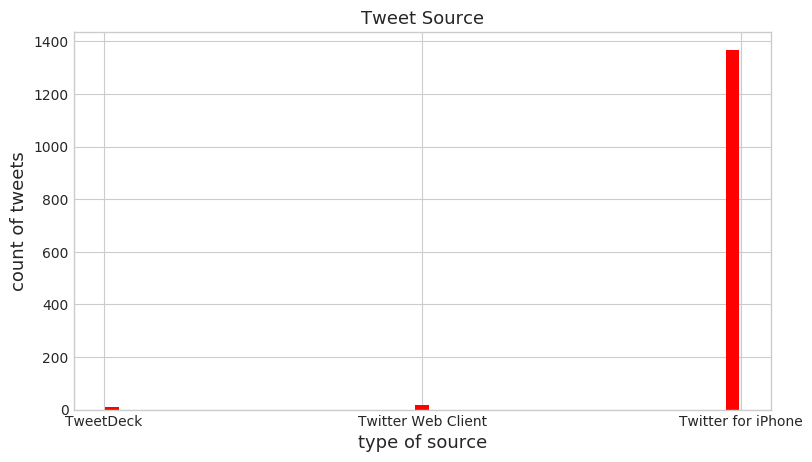

In [567]:
pl.figure(figsize=(9,5), dpi = 100)

pl.xlabel('type of source', fontsize = 13)
pl.ylabel('count of tweets', fontsize=13)
pl.title('Tweet Source', fontsize=13)
pl.hist(all_date['source'], rwidth = 0.8, bins =37, color='red')

pl.show()

**The most used resouce of tweets is: twitter for iphone**

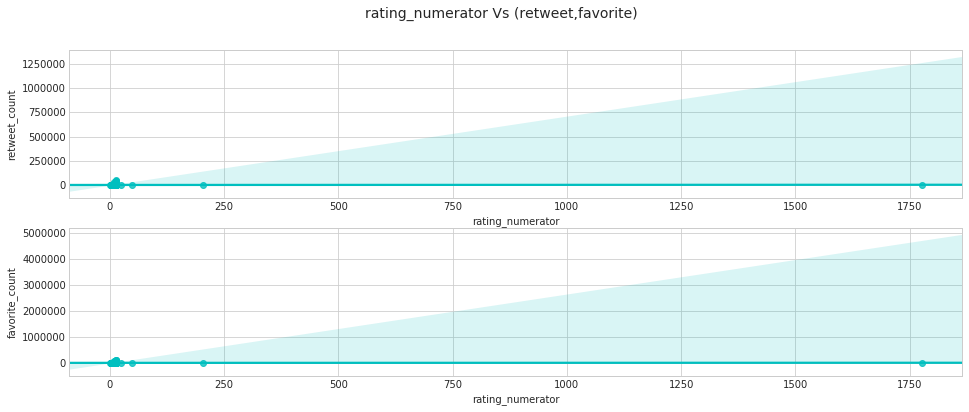

In [568]:
fig, axes = pl.subplots(2,figsize = (16,6))
fig.suptitle("rating_numerator Vs (retweet,favorite)",fontsize=14)

sns.regplot(x=all_date['rating_numerator'], y=all_date['retweet_count'],color='c',ax=axes[0])
sns.regplot(x=all_date['rating_numerator'], y=all_date['favorite_count'],color='c',ax=axes[1])

sns.set_style("whitegrid")

**Once the rating is high both of the retweet and favorate counts will be high too. (Positive relationship)**

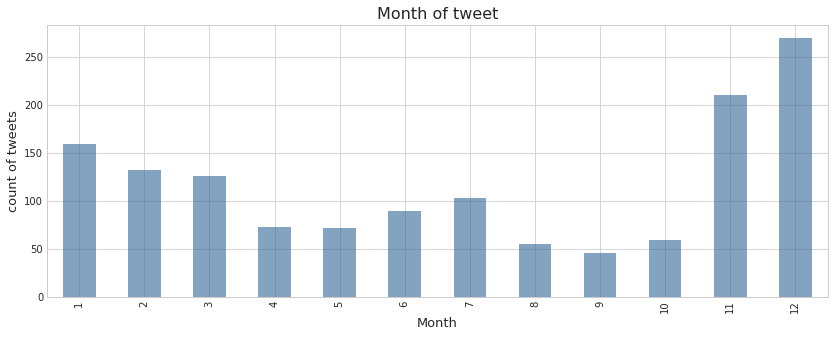

In [569]:
all_date.groupby(all_date["timestamp"].dt.month)['tweet_id'].count().plot.bar(figsize=(14,5),color=(0.2, 0.4, 0.6, 0.6))
pl.xlabel('Month', fontsize = 13)
pl.ylabel('count of tweets', fontsize=13)
pl.title('Month of tweet', fontsize=16)

pl.show()

**December has the largest number of tweets, folloed by November then January.**

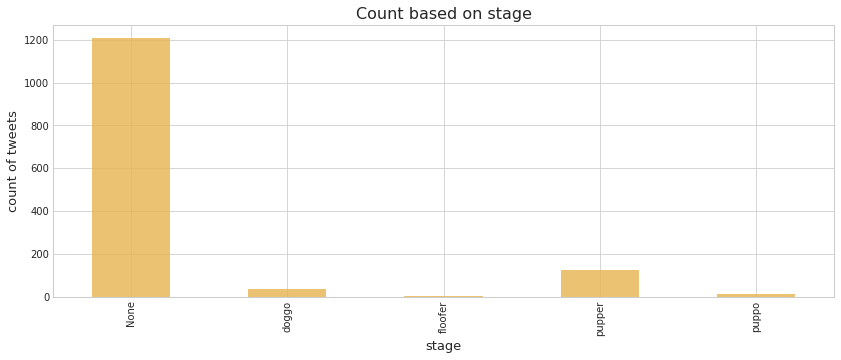

In [570]:

all_date.groupby(all_date["stage"])['tweet_id'].count().plot.bar(figsize=(14,5),color=(0.9, 0.7, 0.3, 0.8))
pl.xlabel('stage', fontsize = 13)
pl.ylabel('count of tweets', fontsize=13)
pl.title('Count based on stage', fontsize=16)

pl.show()

**Most of the stages were not inserted in the data set but for the existing once pupper is the most common followed by Dpggo then Puppo then Floofer.**

Text(0,0.5,'favorite_count')

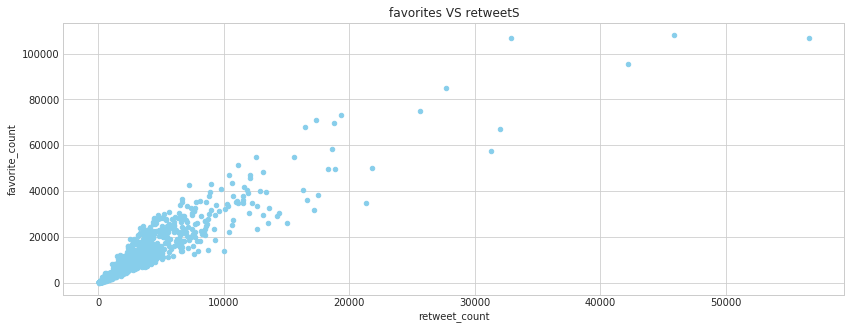

In [571]:
all_date.plot( x='retweet_count', y='favorite_count', kind='scatter', figsize=(14,5),color='skyblue')
pl.title('favorites VS retweetS')
pl.xlabel('retweet_count') 
pl.ylabel('favorite_count')

**December has the largest number of tweets, followed by November then January.**

## References : 


* https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* https://www.pythonforbeginners.com/requests/using-requests-in-python
* https://stackoverflow.com/questions/49823631/pythonic-way-of-applying-regex-to-all-columns-of-dataframe
* https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers
* https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
* https://stackoverflow.com/questions/30164054/raw-string-and-regular-expression-in-python
* https://python-graph-gallery.com/barplot/
* https://www.programiz.com/python-programming/methods/list/append
* https://docs.python.org/2/library/re.html
* https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas/33098470
